# Import 

In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

## columns 
* 'hiveid' : 벌통 번호
* 'recordday' : 날짜 (월 생략)
* 'temp' : 내부 온도
* 'humidity' : 내부 습도
* 'co2' : 내부 co2
* 'weight' : 벌통 무게
* 'incount' : internal activity
* 'outcount' : external activity
* 'pm10' : 미세먼지 입자 (10 micro meter)
* 'pm25' : 초미세먼지
* 'extemphigh' : 외부 최고 기온
* 'extemplow' : 외부 최저 기온

In [3]:
path_2022_12 = './data/2022-12.csv'
path_2023_12 = './data/2023-12.csv'

original = pd.read_csv(path_2022_12)
valid = pd.read_csv(path_2023_12)

original.head()

,hiveid,recordday,temp,humidity,co2,weight,incount,outcount,pm10,pm25,extemphigh,extemplow
0,1,1,4.34,65.91,15,24150,0,0,19,13,2.4,-4.7
1,1,2,5.53,66.56,29,23000,0,0,29,20,6.1,-3.9
2,1,3,8.08,67.94,35,21950,14,7,27,21,10.1,-0.2
3,1,4,8.00,68.05,32,25350,6,0,25,16,5.1,-1.6
4,1,5,5.10,66.49,37,25250,2,3,18,12,3.2,-2.5


In [54]:
train_2022_12_1 = original[original['hiveid'] == 1]
train_2022_12_2 = original[original['hiveid'] == 2]
train_2022_12_3 = original[original['hiveid'] == 3]
print(len(train_2022_12_1))  # 날짜 : 31
train_2022_12_1.head()

31


,hiveid,recordday,temp,humidity,co2,weight,incount,outcount,pm10,pm25,extemphigh,extemplow
0,1,1,4.34,65.91,15,24150,0,0,19,13,2.4,-4.7
1,1,2,5.53,66.56,29,23000,0,0,29,20,6.1,-3.9
2,1,3,8.08,67.94,35,21950,14,7,27,21,10.1,-0.2
3,1,4,8.00,68.05,32,25350,6,0,25,16,5.1,-1.6
4,1,5,5.10,66.49,37,25250,2,3,18,12,3.2,-2.5


In [57]:
def exchange_columns(df):
    final_columns = [c for c in df.columns if c not in ['incount', 'outcount']] + ['incount', 'outcount']

    df_notcount = df[[c for c in df.columns if c not in ['incount', 'outcount']]]
    df_count = df[['incount', 'outcount']]

    df = pd.concat([df_notcount, df_count], axis=1, ignore_index=True)
    df.columns = final_columns
    return df

train_2022_12_1 = exchange_columns(train_2022_12_1)
train_2022_12_1.head()

,hiveid,recordday,temp,humidity,co2,weight,pm10,pm25,extemphigh,extemplow,incount,outcount
0,1,1,4.34,65.91,15,24150,19,13,2.4,-4.7,0,0
1,1,2,5.53,66.56,29,23000,29,20,6.1,-3.9,0,0
2,1,3,8.08,67.94,35,21950,27,21,10.1,-0.2,14,7
3,1,4,8.00,68.05,32,25350,25,16,5.1,-1.6,6,0
4,1,5,5.10,66.49,37,25250,18,12,3.2,-2.5,2,3


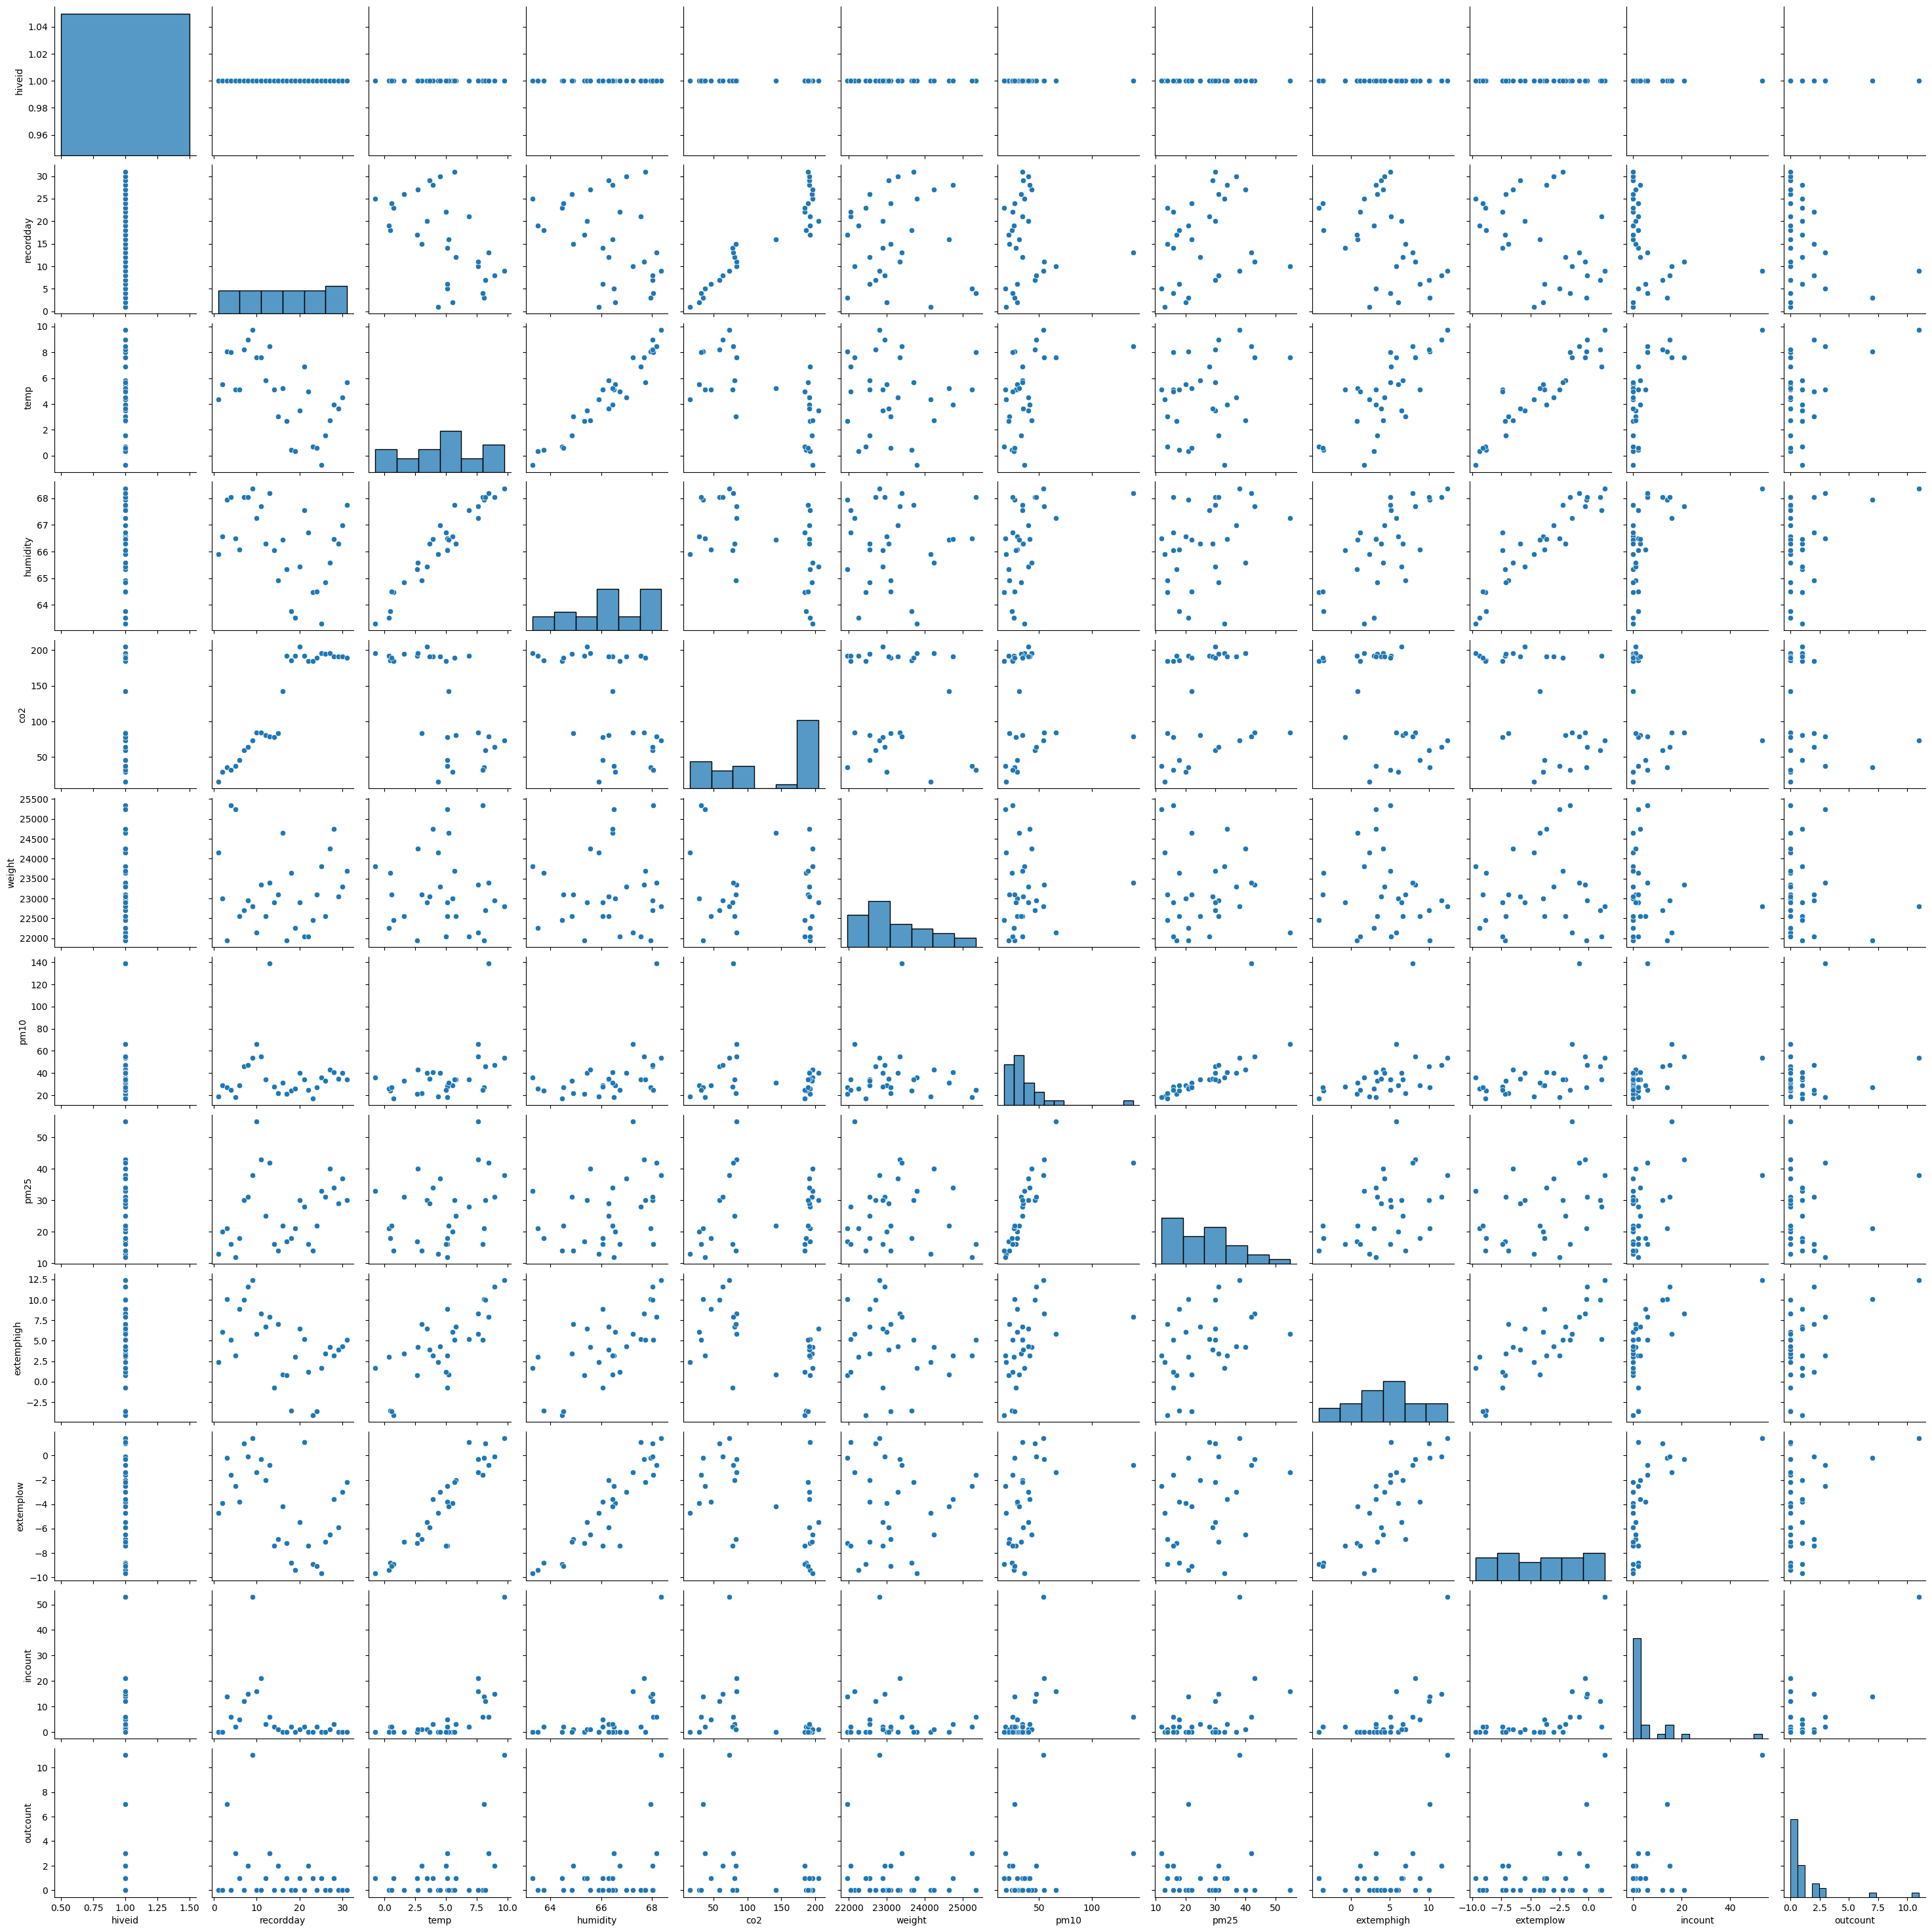

In [58]:
sns.pairplot(train_2022_12_1)
plt.show()

In [59]:
def plot_scatter(df):
    fig, ax = plt.subplots(1, 4, figsize=(12, 3))  # 2행 2열, (가로, 세로)

    # 첫 번째 서브플롯 (1행 1열)
    ax[0].scatter(df['temp'], df['humidity'])
    ax[0].set_xlabel('Temperature')
    ax[0].set_ylabel('Humidity')
    ax[0].set_title('Internal Temp by Humid')

    # 두 번째 서브플롯 (1행 2열)
    ax[1].scatter(df['co2'], df['incount'])
    ax[1].set_xlabel('Co2')
    ax[1].set_ylabel('Incount')
    ax[1].set_title('Internal Activity by Co2')

    # 세 번째 서브플롯 (2행 1열)
    ax[2].scatter(df['extemphigh'], df['outcount'])
    ax[2].set_xlabel('High Temperature')
    ax[2].set_ylabel('Outcount')
    ax[2].set_title('External Activity by High Temp')

    # 네 번째 서브플롯 (2행 2열)
    ax[3].scatter(df['outcount'], df['weight'])
    ax[3].set_ylabel('Outcount')
    ax[3].set_xlabel('Honey weight')
    ax[3].set_title('Honey Weight-External Activity')

    plt.tight_layout()  # 서브플롯 간 간격 조정
    plt.show()


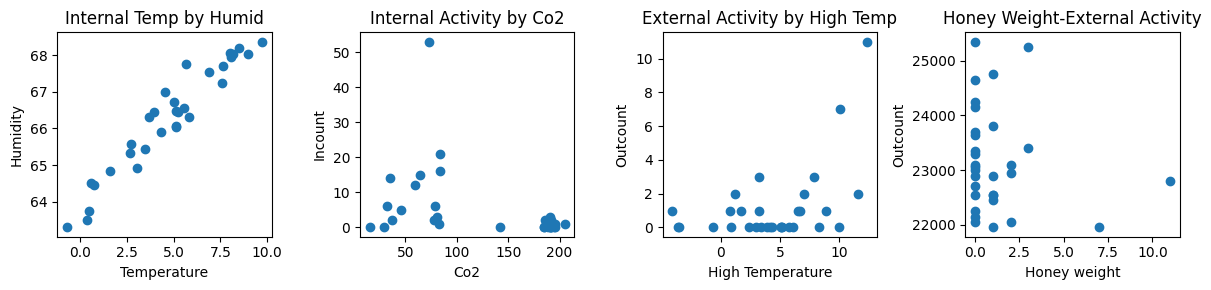

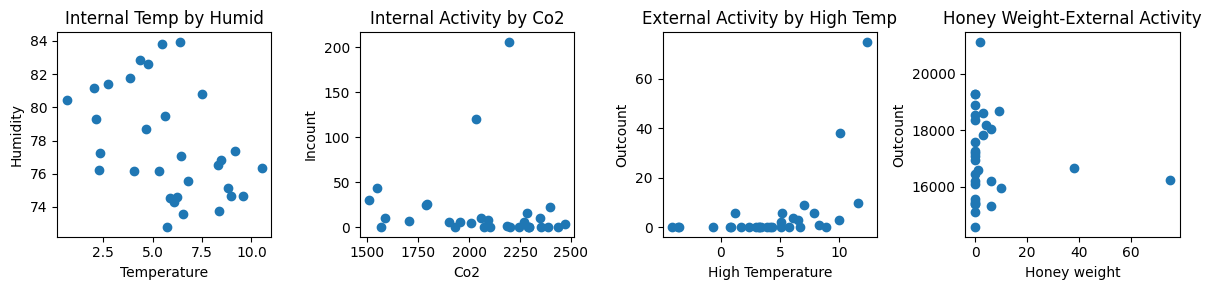

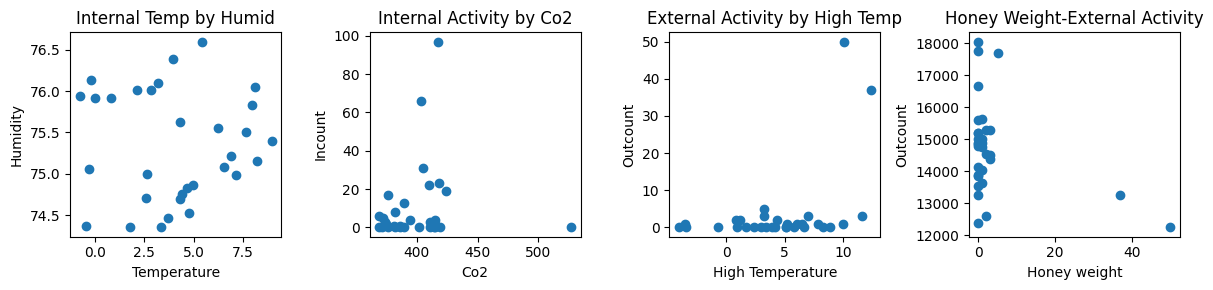

In [61]:
plot_scatter(train_2022_12_1)
plot_scatter(train_2022_12_2)
plot_scatter(train_2022_12_3)